In [178]:
import cartopy
import geopandas as gpd
import xarray as xr
import rioxarray as rx
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt
import matplotlib.ticker as mticker

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

uav_gab = '/exports/csce/datastore/geos/groups/MitchardGroupData/FODEX/imcnicol/UAV-LS/CHM_Ivindo_T1.tif'
uav_gab = rx.open_rasterio(uav_gab).coarsen(x=4,y=4,boundary='trim').mean().rio.reproject('EPSG:4326')

uav_per = '/exports/csce/datastore/geos/groups/MitchardGroupData/FODEX/imcnicol/UAV-LS/CHM_Belgica_T1.tif'
uav_per = rx.open_rasterio(uav_per).coarsen(x=4,y=4,boundary='trim').mean().rio.reproject('EPSG:4326')

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/lib/python3/dist-packages/rioxarray/rioxarray.py:269: UserWarning: The nodata value (-3.4e+38) has been automatically changed to (-3.3999999521443642e+38) to match the dtype of the data.
  warnings.warn(
/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/lib/python3/dist-packages/rioxarray/rioxarray.py:269: UserWarning: The nodata value (-3.4e+38) has been automatically changed to (-3.3999999521443642e+38) to match the dtype of the data.
  warnings.warn(


In [182]:
import io
from urllib.request import urlopen, Request
from PIL import Image
import numpy as np

def image_spoof(self, tile): # this function pretends not to be a Python script
    url = self._image_url(tile) # get the url of the street map API
    req = Request(url) # start request
    req.add_header('User-agent','Anaconda 3') # add user agent to request
    fh = urlopen(req) 
    im_data = io.BytesIO(fh.read()) # get image
    fh.close() # close url
    img = Image.open(im_data) # open image with PIL
    img = img.convert(self.desired_tile_form) # set image format
    return img, self.tileextent(tile), 'lower' # reformat for cartopy

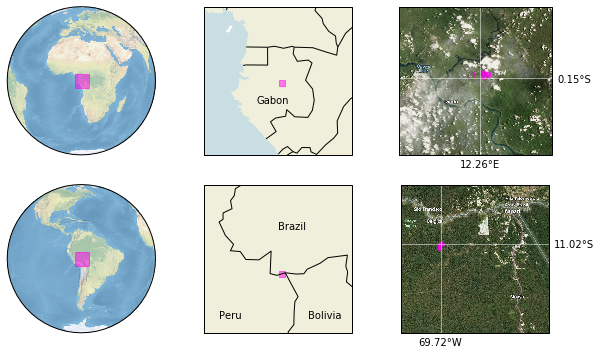

In [261]:
plt.figure(figsize=(10, 6))
ax = plt.subplot(2,3,1,projection=ccrs.Orthographic(central_latitude=0, central_longitude=12))
ax.stock_img()
ax.scatter(x=[12.26], y=[-0.15],
            color="#ff00ee",
            marker='s',
            s=220,
            alpha=0.5,
            transform=ccrs.Geodetic())

ax = plt.subplot(2,3,4,projection=ccrs.Orthographic(central_latitude=-11, central_longitude=-70))
ax.stock_img()
ax.scatter( x=[-69.72], y=[-11.02],
            color="#ff00ee",
            marker='s',
            s=220,
            alpha=0.5,
            transform=ccrs.Geodetic())


ax = plt.subplot(2,3,2, projection=ccrs.PlateCarree())
ax.set_extent([7, 17, -5, 5], crs=ccrs.PlateCarree())
# ax.stock_img()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.NaturalEarthFeature(
    'physical', 'ocean', '50m', edgecolor='face', facecolor='#c8dee3'))
ax.scatter(x=[12.26], y=[-0.15],
            color="#ff00ee",
            marker='s',
            s=30,
            alpha=0.5,
            transform=ccrs.PlateCarree())
ax.annotate('Gabon',(0.35,0.35),xycoords='axes fraction')

ax=plt.subplot(2,3,3,projection=ccrs.PlateCarree())
ax.set_extent([12.1, 12.4, -0.3, -0.01], crs=ccrs.PlateCarree())
# cimgt.GoogleTiles.get_image = image_spoof
request = cimgt.QuadtreeTiles()
ax.add_image(request, 11)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='red', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlocator = mticker.FixedLocator([12.26])
gl.ylocator = mticker.FixedLocator([-0.15])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.axvline(x=12.26,alpha=0.5,lw=1,color='white')
ax.axhline(y=-0.15,alpha=0.5,lw=1,color='white')
shp =gpd.read_file('/exports/csce/datastore/geos/users/s1332488/chapter2_data/UAV_mask.shp').to_crs('EPSG:4326')
shp.plot(ax=ax,transform=ccrs.PlateCarree(),color='#ff00ee',alpha=0.9)

ax = plt.subplot(2,3,5, projection=ccrs.PlateCarree())
ax.set_extent([-75, -65, -15, -5], crs=ccrs.PlateCarree())
# ax.stock_img()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.NaturalEarthFeature(
    'physical', 'ocean', '50m', edgecolor='face', facecolor='#c8dee3'))
ax.scatter(x=[-69.72], y=[-11.02],
            color="#ff00ee",
            marker='s',
            s=30,
            alpha=0.5,
            transform=ccrs.PlateCarree())
ax.annotate('Peru',(0.1,0.1),xycoords='axes fraction')
ax.annotate('Brazil',(0.5,0.7),xycoords='axes fraction')
ax.annotate('Bolivia',(0.7,0.1),xycoords='axes fraction')

ax=plt.subplot(2,3,6,projection=ccrs.PlateCarree())
ax.set_extent([-69.8, -69.5, -11.2, -10.9], crs=ccrs.PlateCarree())
# cimgt.GoogleTiles.get_image = image_spoof
request = cimgt.QuadtreeTiles()
ax.add_image(request, 11)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='red', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlocator = mticker.FixedLocator([-69.72])
gl.ylocator = mticker.FixedLocator([-11.02])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.axvline(x=-69.72,alpha=0.5,lw=1,color='white')
ax.axhline(y=-11.02,alpha=0.5,lw=1,color='white')
shp =gpd.read_file('/exports/csce/datastore/geos/users/s1332488/chapter2_data/uav_cutout.shp').to_crs('EPSG:4326')
shp= shp.loc[[0]]
shp.plot(ax=ax,transform=ccrs.PlateCarree(),color='#ff00ee',alpha=0.9)
# plt.tight_layout()
plt.savefig('/home/s1332488/Chapter3/Figures/site_loc.png',dpi=400)
plt.show()





In [237]:
!pip install descartes

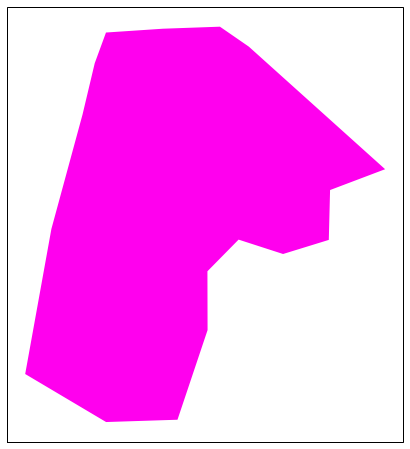

In [260]:
plt.figure(figsize=(8,8))
ax=plt.subplot(1,1,1,projection=ccrs.PlateCarree())
# ax.set_extent([-69.8, -69.5, -11.2, -10.9], crs=ccrs.PlateCarree())
# # cimgt.GoogleTiles.get_image = image_spoof
# request = cimgt.QuadtreeTiles()
# ax.add_image(request, 11)
shp =gpd.read_file('/exports/csce/datastore/geos/users/s1332488/chapter2_data/uav_cutout.shp').to_crs('EPSG:4326')
shp= shp.loc[[0]]
shp.plot(ax=ax,transform=ccrs.PlateCarree(),color='#ff00ee')